In [1]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline


In [3]:
def flip_coin(n):
    heads = 0
    tails = 0
    coin_flips = []
    for x in range(n):
        result = random.choice(['heads', 'tails'])
        if result == 'heads':
            heads += 1
        else:
            tails += 1
        if math.log2(x+1) % 1 == 0:
            coin_flips.append((heads, tails))
    return coin_flips

In [4]:
def diff_flips(list_tupes):
    diff_list = []
    for x, y in list_tupes:
        diff_list.append(abs(x-y))
    return diff_list

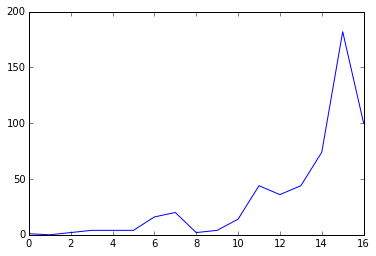

In [5]:
plt.plot(diff_flips(flip_coin(2**16)))
plt.show()

In [6]:
def ratio_flips(list_tupes):
    ratios = []
    for x,y in list_tupes:
        ratios.append(x/(x+y))
    return ratios

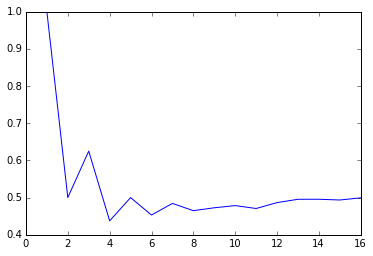

In [7]:
plt.plot(ratio_flips(flip_coin(2**16)))
plt.show()

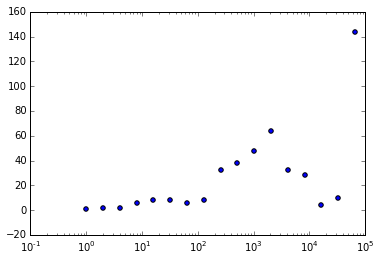

In [8]:
x_values = [2**0, 2**1, 2**2, 2** 3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16]

plt.scatter(x_values, diff_flips(flip_coin(2**16)))
plt.xscale('log')
plt.show()

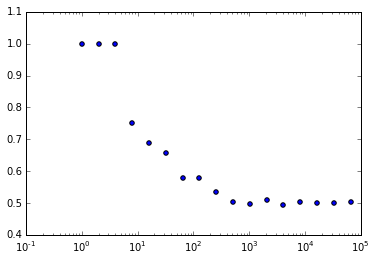

In [9]:
plt.scatter(x_values, ratio_flips(flip_coin(2**16)))
plt.xscale('log')
plt.show()

It is interesting to see the 'random walk' in effect in the differences graph. The ratio graph is interesting in how in stabilizes fairly quickly. In the first few data points the small sample set allows for potentially large ratios. However as the data set gets larger it also stabilizes somewhat.

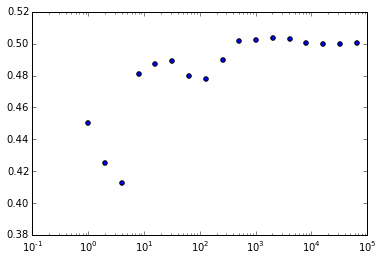

In [10]:
def twenty_trials():
    all_ratios = []
    for x in range(20):
        all_ratios.append(ratio_flips(flip_coin(2**16)))
    return all_ratios

final_ratios = []
for x in list(zip(*twenty_trials())):
    final_ratios.append(st.mean(x))

plt.scatter(x_values, final_ratios)
plt.xscale('log')
plt.show()

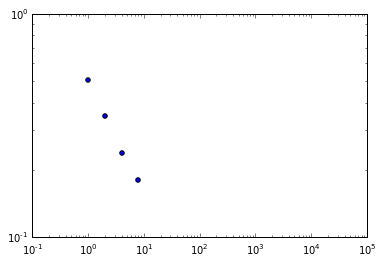

In [11]:
stddev = []
for x in list(zip(*twenty_trials())):
    stddev.append(st.stdev(x))
plt.scatter(x_values, stddev)
plt.yscale('log')
plt.xscale('log')
plt.show()

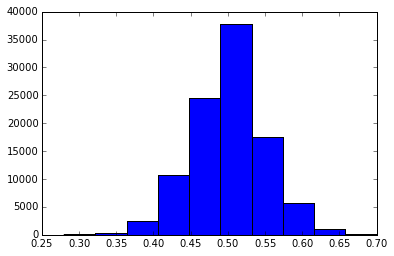

In [12]:
def new_flip(n):
    heads = 0
    for x in range(n):
        flip = random.choice(['heads','tails'])
        if flip == 'heads':
            heads += 1
    return heads/100
            
def trials(n):
    res = [new_flip(100) for x in range(n)]
    return res

plt.hist(trials(100000))
plt.show()

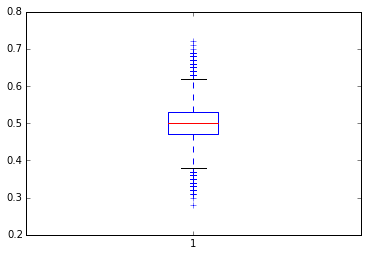

In [13]:
plt.boxplot(trials(100000))
plt.show()

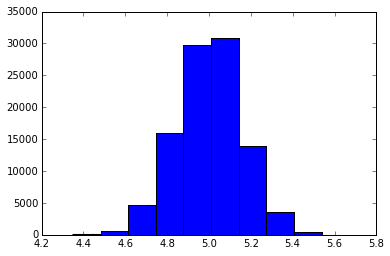

In [14]:
def trials_thousand(n):
    res = [new_flip(1000) for x in range(n)]
    return res

plt.hist(trials_thousand(100000))
plt.show()

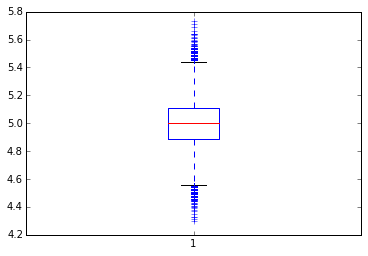

In [17]:
plt.boxplot(trials_thousand(100000))
plt.show()

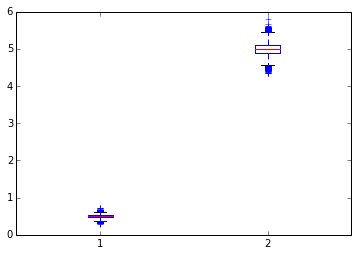

In [19]:
plt.boxplot([trials(100000), trials_thousand(100000)])
plt.show()